In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv("HR_Analytics.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Pie chart

Biểu đồ tròn sử dụng để biểu diễn cơ cấu theo phần trăm. Toàn bộ hình tròn đại diện cho tổng số và mỗi phần nhỏ đại diện cho một mục cụ thể, kích thước của từng mục là tỉ trọng của mục đó trong tổng thể.

Do việc vẽ và nhận xét từng biểu đồ khá tốn thời gian và sẽ làm bài làm rất dài nên mỗi khung trực quan sẽ làm cùng lúc cho 2 trường dữ liệu.

### Hàm để vẽ biểu đồ tròn

In [3]:
def pie_plot(col, title, start):
    temp = data.groupby([col])['Age'].count()
    plt.pie(temp.values, labels = temp.index, colors=sns.color_palette("husl", len(temp.index)), autopct='%1.f%%', startangle = start)
    plt.title(title)

### Trường dữ liệu Education + JobInvolvement

**Giải thích:**
- Đây là 2 cột dữ liệu dạng categorical nhưng được encode thành dạng numeric.
- 2 cột này đều có từ 3 giá trị trở lên và cũng không có quá nhiều giá trị khác nhau.
- Ở đây muốn xem cơ cấu lao động của từng phân loại nên ta sẽ dùng biểu đồ tròn.

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

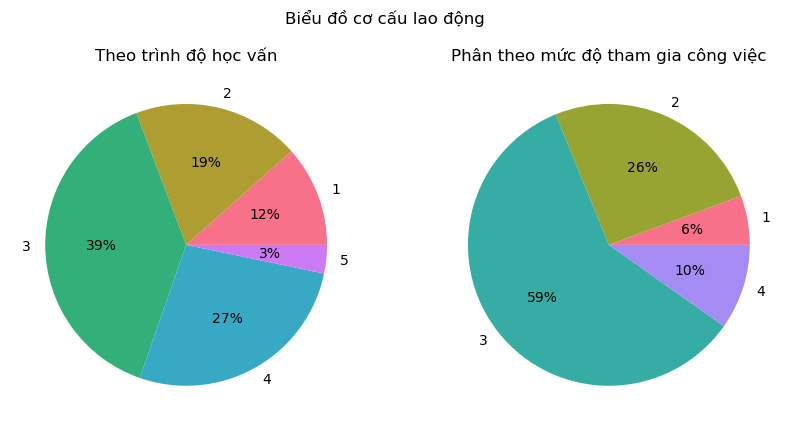

In [4]:
plt.figure(figsize = (10, 10))

plt.subplot(1,2,1)
pie_plot('Education', 'Theo trình độ học vấn', 0)

plt.subplot(1, 2, 2)
pie_plot('JobInvolvement', 'Phân theo mức độ tham gia công việc', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

**Nhận xét:**
- Ta có thể thấy đa số nhân viên đều có trình độ học vấn từ tầm trung trở lên, nhưng nhân viên trình độ cao chiếm tỉ trọng rất nhỏ (chỉ 3%). Ngoài ra các nhân viên có trình độ thấp chiếm tỉ trọng nhỏ (31%) điều này có thể cho thấy hiệu quả của việc phổ cập kiến thức, đa số ai cũng phải có trình độ đồng thời cũng cho thấy mức độ đào thải của công ty đối với nhóm công nhân này.
- Đa số nhân viên đều có mức độ đóng góp như nhau (59%), mức thấp nhất chỉ chiếm có 6%.

### Trường dữ liệu JobSatisfaction + PerformanceRating

**Giải thích:**
- Đây là 2 cột dữ liệu dạng categorical nhưng được encode thành dạng numeric.
- Ở đây muốn xem cơ cấu lao động của từng phân loại nên ta sẽ dùng biểu đồ tròn.

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

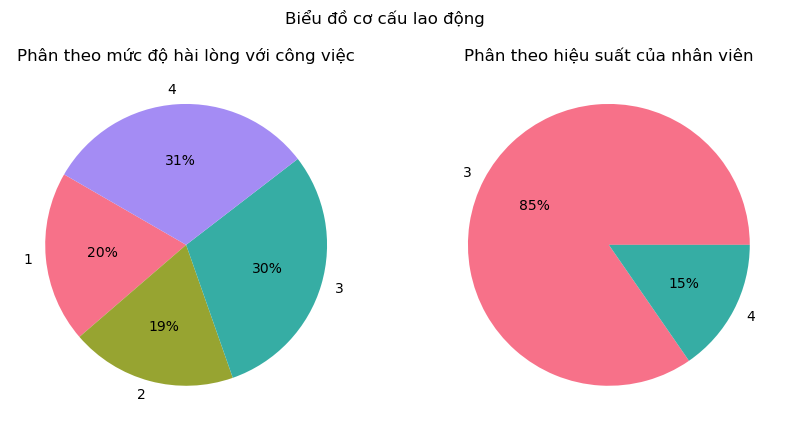

In [6]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('JobSatisfaction', 'Phân theo mức độ hài lòng với công việc', 150)

plt.subplot(1, 2, 2)
pie_plot('PerformanceRating', 'Phân theo hiệu suất của nhân viên', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

**Nhận xét:**
- Mức độ phân chia công việc có sự phân bố khá đồng đều về số lượng ở từng mức, nhưng nhìn chung thì các nhân viên đều rất hài lòng với công việc của mình, tỉ lệ hài lòng ở mức 3 và 4 chiếm 61% hơn phân nửa.
- Hiệu suất của nhân viên chỉ có 2 giá trị là 3 và 4 vì thế ta tạm hiểu mức 3 là thấp, 4 là cao. Hầu hết nhân viên có năng suất thấp (85%) gấp gần 6 lần so với nhân viên có năng suất cao.

### Trường dữ liệu Department + EducationField

**Giải thích:**
- Đây là 2 cột dữ liệu dạng categorical có 3 giá trị khác nhau trở lên, không có quá nhiều giá trị khác nhau.
- Ở đây muốn xem cơ cấu lao động của từng phân loại nên ta sẽ dùng biểu đồ tròn.

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

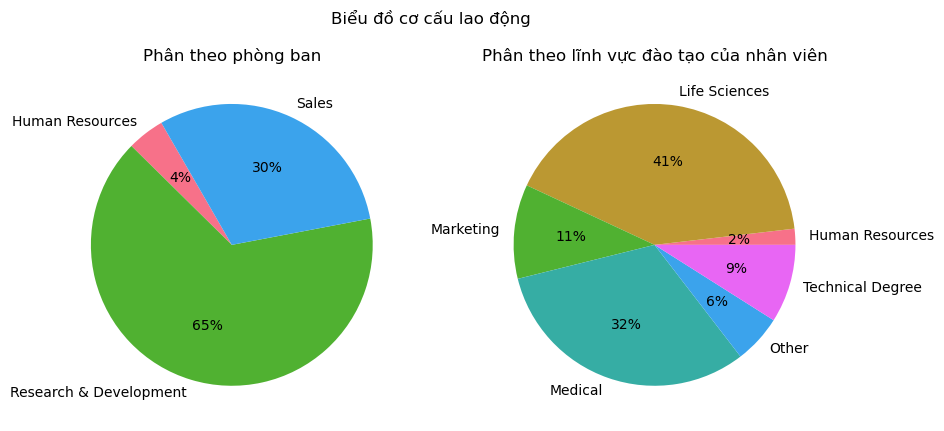

In [7]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('Department', 'Phân theo phòng ban', 120)

plt.subplot(1, 2, 2)
pie_plot('EducationField', 'Phân theo lĩnh vực đào tạo của nhân viên', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

**Nhận xét:**
- Công ty có hơn một nửa số lượng nhân viên trong mảng nghiên cứu và lập trình, bộ phận sales chưa đến một nửa của bộ phận nghiên cứu. Nhóm về tài nguyên con người chiếm tỉ lệ thấp nhất là 4%, nhóm này thuộc về mảng quản lý và các hoạt động liên quan đến nhân sự (bao gồm tuyển dụng, đào tạo, phát triển và quản lý nhân viên) nên việc số lượng ít là điều cũng dễ hiểu do đâu thể nào quản lý lại nhiều hơn nhân viên.
- Lĩnh vực về Life Sciences và Medical chiếm 3/4 (73%) trên tổng số nhân viên của công ty. Thấp nhất là mảng tài nguyên con người và Other (các nhóm khác). Marketing và Technical cũng chiếm tỉ trọng nhỏ chỉ 1/5 trên toàn công ty.

### Trường dữ liệu MaritalStatus + BusinessTravel

**Giải thích:**
- Đây là 2 cột dữ liệu dạng categorical có 3 giá trị khác nhau trở lên.
- Ở đây muốn xem cơ cấu lao động của từng phân loại nên ta sẽ dùng biểu đồ tròn.

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

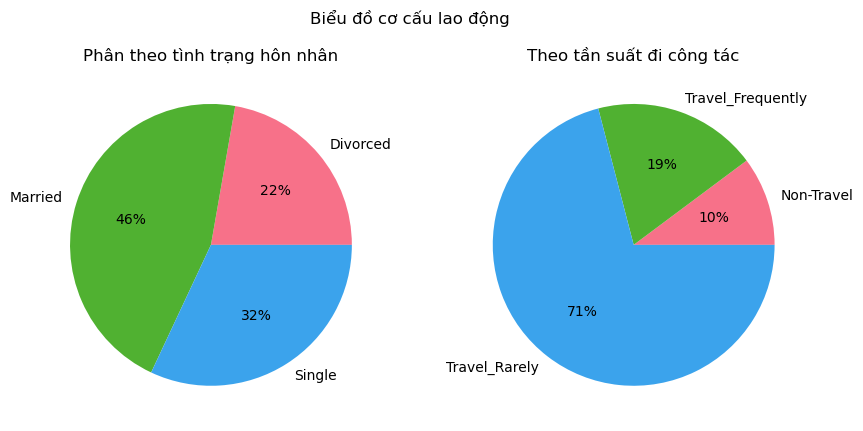

In [8]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('MaritalStatus', 'Phân theo tình trạng hôn nhân', 0)

plt.subplot(1,2,2)
pie_plot('BusinessTravel', 'Theo tần suất đi công tác', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

**Nhận xét:**
- Khác với nhiều người nghĩ, trong một công ty luôn có rất nhiều người đã lập gia đình thì trong biểu đồ này ta có thể thấy có tận 1/3 nhân viên chưa từng kết hôn, điều này có thể có nhiều nguyên do như: nhân lực trẻ, kết hôn muộn hoặc thời hiện nay áp lực lập gia đình đã giảm bớt, mọi người có thể tự lựa chọn lối sống cho riêng mình và nhiều người lựa chọn sống độc thân. Ngoài ra thì tỉ lệ người đã ly dị cũng rất cao chiếm 1/5 trên tổng số nhân công trong công ty và nếu 3 người kết hôn thì sẽ có 1 người ly dị, đây là một tỉ lệ rất lớn. Điều này có thể là do hiện nay, suy nghĩ về việc ly hôn của mọi người đã thoáng hơn, không còn bị chì chiết, chỉ trích hậu ly hôn, phụ nữ cũng có công ăn việc làm ổn định không bị phụ thuộc vào kinh tế nên người ta cũng không cần quá cố để sống chung trong mệt mỏi mà chủ động kết thúc trong êm đẹp trước khi mọi chuyện phát triển theo hướng tiêu cực hơn.
- Về tỉ lệ đi công tác, đa số có tần suất thấp và một số ít (10%) không cần phải đi công tác. Như vậy xem ra công ty này rất có khả năng là công ty quốc tế, do tỉ lệ nhân viên đi công tác rất cao (tận 90%), là một con số rất cao so với mặt bằng chung.

## Bar chart

Biểu đồ cột dùng để thống kê số lượng hoặc so sánh độ lớn giữa các cá thể khác nhau.

### Trường dữ liệu JobRole

**Giải thích:**
- Ở đây dùng biểu đồ cột để thống kê về số lượng nhân viên dựa theo vai trò trong tổ chức. Ở đây dùng biểu đồ cột để so sánh độ lớn giữa số lượng nhân viên giữa các phòng ban. 
- Nhìn rõ ràng hơn về thứ tự xếp hạng nhưng bù lại thì chỉ ước lượng được tỉ lệ chênh lệch giữa các vai trò.

Text(0.5, 1.0, 'Số lượng nhân viên chia theo vai trò trong tổ chức')

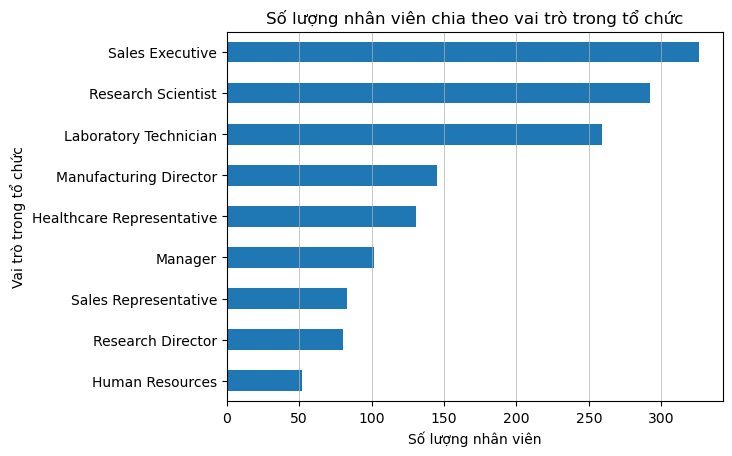

In [9]:
temp = data.groupby(['JobRole'])['Age'].count()
temp = temp.sort_values()
temp.plot(kind = 'barh')
plt.grid(axis = 'x', linewidth = 0.5)
plt.xlabel('Số lượng nhân viên')
plt.ylabel('Vai trò trong tổ chức')
plt.title("Số lượng nhân viên chia theo vai trò trong tổ chức")

**Nhận xét:** Ở đây số lượng nhân viên được chia làm 3 tầng
- Các vai trò có nhiều nhân viên nhất: **Sales Executive, Research Scientist, Laboratory Tachnican** có sự cách biệt lớn về số lượng nhân viên so với những vai trò khác. Điểm chung của chúng là đều là nhân viên trực tiếp tham gia nghiên cứu và phát triển sản phẩm vì thế mà cần một số lượng lớn.
- Các vai trò có ít nhân viên nhât: **Sales Representative, Research Director, Human Resources"** điểm chung của chúng là đều là nhóm quản lý và đưa ra chiến lược. Cũng khá dễ hiểu khi nhóm này có số lượng ít ỏi do số lượng quản lý chắc chẳn phải thấp hơn số lượng nhân viên.
- Nhóm còn lại: **Laboratory Technican, Manufacturing Director, Healthcare Representation** đây là nhóm về y tế và quản lý.

## Grouped bar chart

Biểu đồ cột ghép dùng để so sánh hay thống kê về kích thước / số lượng theo 2 phân loại khác nhau.

### Trường dữ liệu MaritalStatus, OverTime và Gender

**Giải thích:**
- Với 3 biến đã chọn thì cần một loại biểu đồ có thể biểu diễn được 3 chiều dữ liệu, trong số đó có một chiều là tỉ lệ có độ lớn có thể dùng bar chart nên sẽ dùng biểu đồ cột ghép.
- Biểu đồ thể hiện độ lớn của tỉ lệ theo 2 biến phân loại là tình trạng hôn nhân và giới tính.

Đầu tiên ta cần thống kê tỉ lệ phần trăm làm thêm giờ của nam và nữ dựa trên tình hình hôn nhân và kết quả sẽ được lưu ở cột **percent**

In [10]:
temp1 = data.groupby(['MaritalStatus', 'OverTime', 'Gender'])['Age'].count().reset_index()
temp1 = temp1[temp1['OverTime'] == 'Yes'].reset_index(drop = True)
temp = data.groupby(['MaritalStatus', 'Gender'])['Age'].count().reset_index()
temp['percent'] = temp1['Age'] / temp['Age'] * 100
temp

,MaritalStatus,Gender,Age,percent
0,Divorced,Female,117,36.752137
1,Divorced,Male,210,26.666667
2,Married,Female,272,27.205882
3,Married,Male,401,27.930175
4,Single,Female,199,31.658291
5,Single,Male,271,25.092251


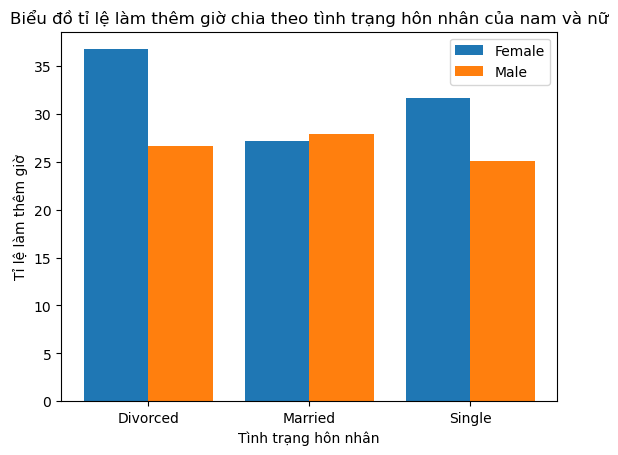

In [11]:
plt.bar(np.arange(3) - 0.2, temp[temp['Gender'] == 'Female']['percent'], 0.4, label = 'Female')
plt.bar(np.arange(3) + 0.2, temp[temp['Gender'] == 'Male']['percent'], 0.4, label = 'Male')
plt.xticks(np.arange(3), temp['MaritalStatus'].unique())
plt.legend()
plt.title("Biểu đồ tỉ lệ làm thêm giờ chia theo tình trạng hôn nhân của nam và nữ")
plt.xlabel('Tình trạng hôn nhân')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.show()

**Nhận xét:**
- Ta có thể thấy tỉ lệ nữ làm thêm giờ cao hẳn hơn nam trong trường hợp độc thân hoặc đã ly hôn, trong trường hợp kết hôn tỉ lệ nữ làm thêm giờ sụt hẳn và ngược lại với nam do nam đạt tỉ lệ cao nhất ở cột kết hôn.
- Sự khác biệt trên có thể được giải thích là khi nữ đã kết hôn thì sẽ phải dành nhiều thời gian cho gia đình, nội trợ và con cái còn đàn ông thì phải phụ trách về kinh tế trong gia đình nên có sự thay đổi lớn trong nhóm trong tình trạng kết hôn.
- Nhưng khi ly hôn, tỉ lệ làm thêm của nữ lại tăng vọt, điều này có thể là do ngoài thiếu đi sự hỗ trợ kinh tế từ chồng, phụ nữ còn phải kiếm thêm tiền so với lúc độc thân để chăm sóc cho con cái. Dù nam vẫn có nhưng một phần là do trong quá trình trong mối quan hệ hôn nhân, người nam vẫn tập trung toàn lực về công việc nên sẽ thuận lợi hơn trong con đường thăng tiến nên không làm thêm giờ là do mức lương của nam tăng trưởng nhanh.

## Word cloud

Biểu đồ Word Cloud biểu diễn tần suất xuất hiện của từng cá thể trong tổng thể bằng kích thước của cá thể đó trong đám mây từ và cũng nhờ thế mà nó nhấn mạnh hơn về các phần tử có tần suất xuất hiện cao. 
Radar chart cũng khá giống với pie chart hoặc bar chart nhìn vào sẽ biết được cái nào xuất hiện nhiều, cái nào ít. Tuy nhiên không thể ước lượng về tỉ lệ khác nhau (cái này gấp bao nhiêu lần cái kia) giữa các phần tử.

Sau khi đã trực quan, nhóm nhận thấy dùng word cloud sẽ chỉ tốt cho trường hợp nhấn mạnh về tần suất xuất hiện vượt trội của một cá thể nào đó, tăng thêm tính thẩm mỹ và thu hút người nhìn, còn để so sánh được lớn hơn bao nhiêu hoặc biết chính xác chiếm bao nhiêu thì dùng biểu đồ tròn sẽ tốt hơn.

### Trường dữ liệu JobRole

**Giải thích:**
- Muốn dùng biểu đồ word cloud để nhấn mạnh, tìm ra top những phòng ban có số lượng nhân viên cao nhất và thấp nhất, không quan tâm đến thứ hạng chính xác.

Text(0.5, 1.05, 'Các phòng ban có nhiều nhân viên')

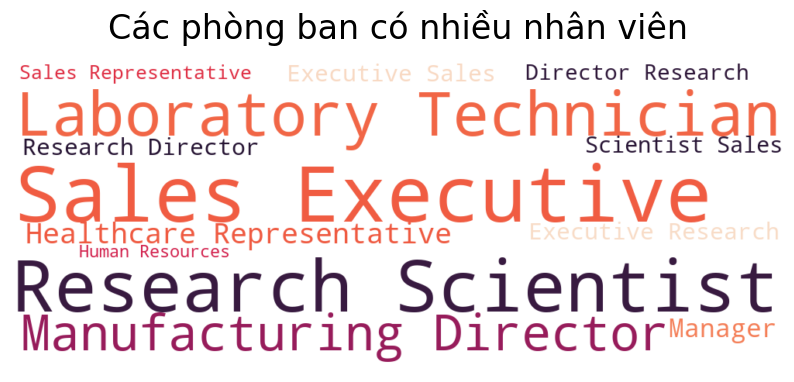

In [12]:
data['Job_Role'] = data['JobRole'].str.replace(' ', '-')
text = " ".join(i for i in data[data['Attrition'] == 'No']['Job_Role'].values)
wordcloud=WordCloud(width=1000,height=400,margin=1,background_color='white', colormap='rocket').generate(text)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Các phòng ban có nhiều nhân viên", size = 24, y = 1.05)

**Nhận xét:**
- Nhìn vào kích thước chữ trên bảng Word Count ta có thể thấy Sales Executive và Research Scientist có số lượng nhân viên đông nhất. Human Resources có số lượng thấp nhất.

### Trường dữ liệu EducationField

**Giải thích:**
- Muốn dùng biểu đồ word cloud để nhấn mạnh, tìm ra top những lĩnh vực đào tạo có số lượng nhân viên cao nhất và thấp nhất, không quan tâm đến thứ hạng chính xác.

Text(0.5, 1.05, 'Các lĩnh vực có nhiều nhân viên')

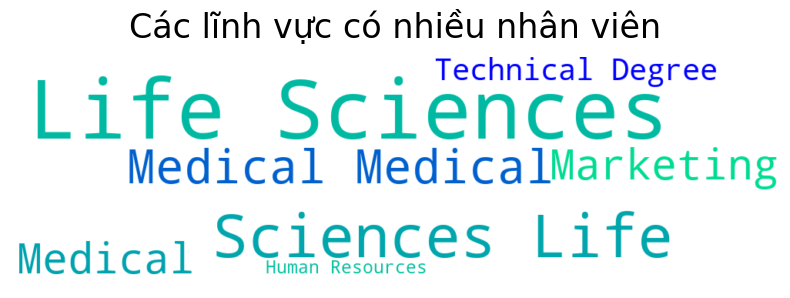

In [13]:
data['Education_Field'] = data['EducationField'].str.replace(' ', '-')
text = " ".join(i for i in data[data['Attrition'] == 'No']['Education_Field'].values)
wordcloud=WordCloud(width=1000,height=300,margin=1,background_color='white', colormap = 'winter').generate(text)
plt.figure(figsize = (10, 3))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Các lĩnh vực có nhiều nhân viên", size = 24, y = 1.05)

**Nhận xét:**
- Nhìn vào kích thước chữ trên bảng Word Count ta có thể thấy Life Sciences có số lượng nhân viên đông nhất. Human Resources có số lượng thấp nhất.

## Radar chart

Radar chart dùng để so sánh cùng lúc nhiều tính chất của 2 hoặc nhiều cá thể / nhóm phân loại khác nhau. Nhìn vào biểu đồ ta có thể dễ dàng thấy được nhóm hoặc cá thể nào có điểm mạnh, điểm yếu là gì và đồng thời cũng thấy được tỉ lệ chênh lệch giữa các nhóm với nhau.

Để vẽ sơ đồ so sánh chỉ số trung bình của nhân viên có mức lương cao và thấp thì ta cần định nghĩa thế nào là cao, thế nào là thấp?

Ở đây nhóm lựa chọn mức thấp là __MonthlyIncome <= 3000 và MonthlyIncome >= 15000__ cho mức cao.

Do độ lớn của cột năm chêch lệch lớn với các cột khác nên ta sẽ chia 3 để giữ nguyên tỉ lệ chênh lệch giữa nhóm cao và thấp đồng thời cũng dễ quan sát trên biểu đồ hơn.

In [14]:
status = ['Education', 'NumCompaniesWorked', 'JobLevel', 'YearsInCurrentRole', 'YearsAtCompany']
angles = np.linspace(0,2 * np.pi, len(status), endpoint = False)
angles = np.concatenate((angles, [angles[0]]))
status.append(status[0])

In [15]:
low_salary = data[data['MonthlyIncome'] <= 3000]
low_salary = low_salary[status].mean().values
low_salary[3:5] = low_salary[3:5] / 3

In [16]:
high_salary = data[data['MonthlyIncome'] >= 15000]
high_salary = high_salary[status].mean().values
high_salary[3:5] = high_salary[3:5] / 3

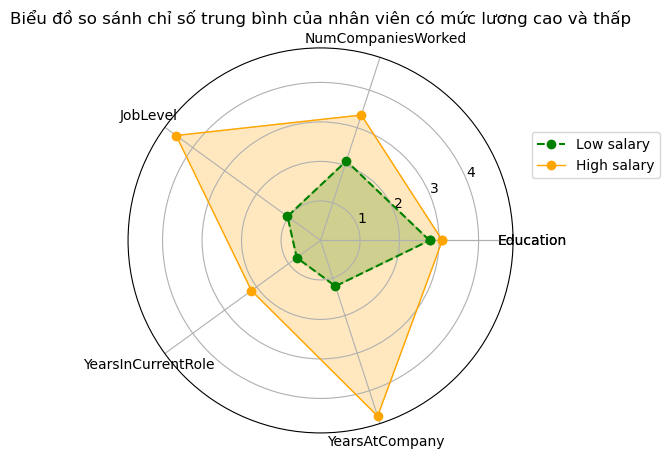

In [17]:
fig=plt.figure(figsize=(5,5))

ax = fig.add_subplot(polar=True)

ax.plot(angles, low_salary, 'o--', color = 'g', label = 'Low salary')
ax.fill(angles, low_salary, alpha = 0.25, color = 'g')

ax.plot(angles, high_salary, 'o-', color = 'orange', linewidth = 1, label='High salary')
ax.fill(angles, high_salary, alpha = 0.25, color='orange')

ax.set_thetagrids(angles * 180 / np.pi, status)

plt.legend(bbox_to_anchor = (1.4, 0.8))
plt.title("Biểu đồ so sánh chỉ số trung bình của nhân viên có mức lương cao và thấp")
plt.show()

**Nhận xét:**
- Ở biểu đồ này ta thấy chênh lệch giữa người có mức lương cao và thấp là không nhiều.
- Chênh lệch lớn nhất là ở thời gian làm việc tại công ty và cấp độ công việc của nhân viên. Như vậy ta có thể thấy rõ việc gắn bó lâu dài với công ty cũng là một điểm cộng đối với mức lương của nhân viên, và thời gian làm việc lâu dài thì nhân viên cũng có nhiều cơ hội thăng tiến, ở cấp độ công việc càng cao thì lương cũng càng cao.
- Tiếp theo ta cũng thấy Số năm nhân viên đảm nhận vị trí hiện tại và Số lượng công ty đã làm việc qua cũng liên quan đến kinh nghiệm của bản thân. Việc nhảy việc cũng là một yếu tố để nhân viên có được mức lương tăng nhanh hơn so với mức tăng trưởng thông thường.

## Logistic Regression

### Trường dữ liệu Gender, Attrition và Age
**Vậy thì tỉ lệ nghỉ việc giữa nam và nữ có gì khác nhau không nếu so cùng một độ tuổi**

Tại đây ta sẽ encode biến Attrition với 1 là Yes nghĩa là đã nghỉ việc, 0 là No nghĩa là vẫn còn làm tại công ty.

Sau đó ta dùng hàm Logit để tìm phương trình hồi quy logistic của hàm.

Cuối cùng là dùng biểu đồ đường để trực quan mối quan hệ giữa tỉ lệ nhân viên nghỉ việc theo độ tuổi.

Optimization terminated successfully.
         Current function value: 0.394148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448164
         Iterations 6


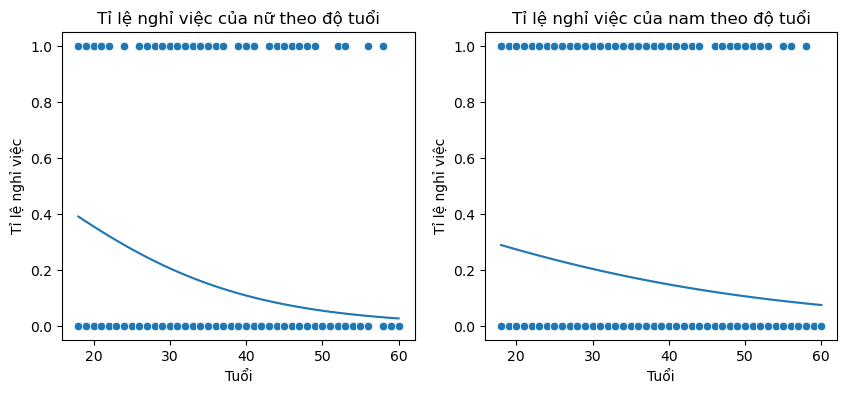

In [18]:
temp = data[data['Gender'] == "Female"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].dropna()
y = temp['Attrition']
X = temp['Age']
X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()
predictions = model1.predict(X)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'Attrition')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ nghỉ việc')
plt.title("Tỉ lệ nghỉ việc của nữ theo độ tuổi")

temp = data[data['Gender'] == "Male"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].dropna()
y = temp['Attrition']
X = temp['Age']
X = sm.add_constant(X)
model2 = sm.Logit(y, X).fit()
predictions = model2.predict(X)

plt.subplot(1, 2, 2)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'Attrition')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ nghỉ việc')
plt.title("Tỉ lệ nghỉ việc của nam theo độ tuổi")
plt.show()

In [19]:
print("Phương trình hồi quy cho nữ: log(y * (1 - y)) =", round(model1.params[0], 3), '-', round(-model1.params[1], 3), '* x' )
print("Phương trình hồi quy cho nam: log(y * (1 - y)) =", round(model2.params[0], 3), '-', round(-model2.params[1], 3), '* x' )

Phương trình hồi quy cho nữ: log(y * (1 - y)) = 0.914 - 0.076 * x
Phương trình hồi quy cho nam: log(y * (1 - y)) = -0.208 - 0.039 * x


Nhìn vào biểu đồ phía trên ta có thể rút ra nhận xét như sau:
- Giống nhau: ở độ tuổi càng nhỏ thì tỉ lệ nhảy việc càng cao và càng lớn tuổi thì khả năng gắn bó với công ty càng cao.
- Khác nhau: Khi còn trẻ nữ sẽ nhảy việc nhiều hơn nam nhưng đồng thời cũng sẽ tìm được công ty phù hợp với mình nhanh hơn như hình trên thì độ dốc của biểu đồ bên nữ cao hơn bên nam.

### Trường dữ liệu Gender, OverTime và Age
**Thực hiện tương tự cho tỉ lệ làm thêm giờ giữa nam và nữ có gì khác nhau không nếu so cùng một độ tuổi**

Tại đây ta sẽ encode biến Overtime với 1 là Yes nghĩa là làm thêm giờ, 0 là No nghĩa là không làm thêm giờ.

Sau đó ta dùng hàm Logit để tìm phương trình hồi quy logistic của hàm.

Cuối cùng là dùng biểu đồ đường để trực quan mối quan hệ giữa tỉ lệ nhân viên làm thêm giờ theo độ tuổi.

Optimization terminated successfully.
         Current function value: 0.615736
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579007
         Iterations 5


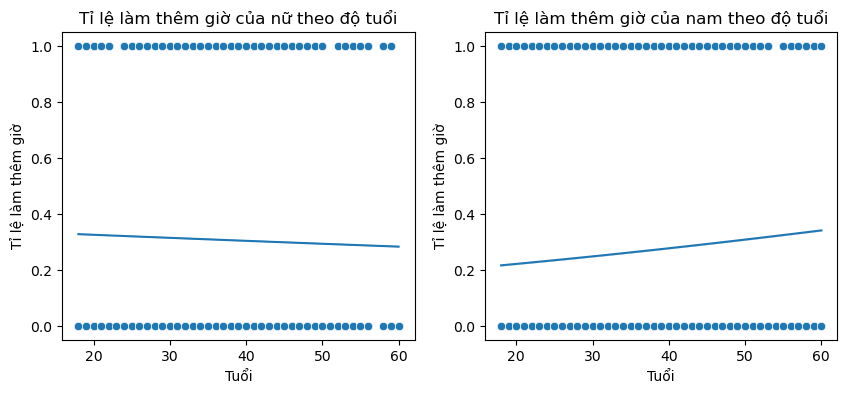

In [20]:
temp = data[data['Gender'] == "Female"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].dropna()
y = temp['OverTime']
X = temp['Age']
X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()
predictions = model1.predict(X)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'OverTime')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.title("Tỉ lệ làm thêm giờ của nữ theo độ tuổi")

temp = data[data['Gender'] == "Male"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].dropna()
y = temp['OverTime']
X = temp['Age']
X = sm.add_constant(X)
model2 = sm.Logit(y, X).fit()
predictions = model2.predict(X)

plt.subplot(1, 2, 2)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'OverTime')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.title("Tỉ lệ làm thêm giờ của nam theo độ tuổi")
plt.show()

In [21]:
print("Phương trình hồi quy cho nữ: log(y * (1 - y)) = ", round(model1.params[0], 3), '-', round(-model1.params[1], 3), '* x' )
print("Phương trình hồi quy cho nam: log(y * (1 - y)) = ", round(model2.params[0], 3), '-', round(-model2.params[1], 3), '* x' )

Phương trình hồi quy cho nữ: log(y * (1 - y)) =  -0.632 - 0.005 * x
Phương trình hồi quy cho nam: log(y * (1 - y)) =  -1.561 - -0.015 * x


**Nhận xét:**
- Thời gian đầu nữ làm thêm giờ rất nhiều nhưng về sau lại giảm, còn nam thi càng lớn tuổi thì tỉ lệ làm thêm giờ càng cao. Điều này có thể giải thích bằng việc sau khi kết hôn, phụ nữ sẽ phải dành nhiều thời gian hơn cho gia đình, nội trợ và con cái còn đàn ông thì phải phụ trách chính trong kinh tế.